## This is a small project in whick I will build a CNN

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import random

In [60]:
#create a image (128x128)in grayscale with a white background (1)
img = [[255 for i in range(128)]for j in range(128)]
img[0][0] = 0

#create a rectangle with random height, width and position
rect_height = random.randint(1,50)
rect_width = random.randint(1,50)
rect_pos =  {"x":random.randint(rect_width, 128-rect_width), 
            "y": random.randint(rect_height, 128-rect_height)
            }

#draw rectangle in image


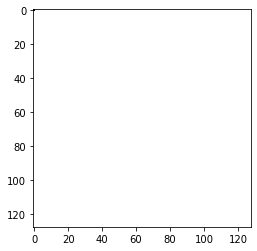

In [61]:
plt.imshow(img,cmap="gray")